# 지도학습

# 선형회귀(Linear Regression)

회귀 모델이란?

- 어떤 자료에 대해서 그 값에 영향을 주는 조건을 고려하여 구한 평균
    (어떤 데이터들이 굉장히 크거나 작을지라도 전체적으로 이 데이터들은 전체 평균으로 회귀하려는 특징이 있다는 통계학적 기법)

$$
y = h(x_1, x_2, x_3, ..., x_k; W_1, W_2, W_3, ..., W_k) + \epsilon
$$

### 선형 모델이란?

- 입력 특성에 대한 선형 함수를 만들어 예측을 수행

- 다양한 선형 모델이 존재

- 분류와 회귀에 모두 사용

## 예시 문제 1

시험 성적 데이터



| X(학습 시간) | Y(시험 점수) |
| ------------ | ------------ |
| 9            | 90           |
| 8            | 80           |
| 4            | 40           |
| 2            | 20           |


- 7시간 공부 할 경우 성적은?

In [23]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x = [9, 8, 4, 2]
y = [90, 80, 40, 20]

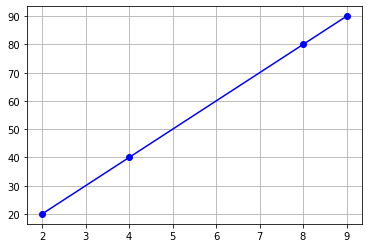

In [14]:
plt.plot(x, y, 'b-o')
plt.grid()
plt.show()

$$
y = ax + b
$$

a: 기울기

b: 절편

## 예시 문제 2

시험 성적 데이터



| X(학습 시간) | Y(시험 점수) |
| ------------ | ------------ |
| 8            | 97           |
| 6            | 91           |
| 4            | 93           |
| 2            | 81           |


- 7시간 공부 할 경우 성적은?

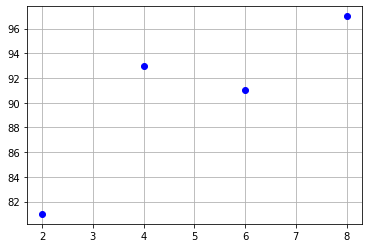

In [20]:
x = [8, 6, 4, 2]
y = [97, 91, 93, 81]

plt.plot(x, y, 'bo')
plt.grid()
plt.show()

## 최소제곱법

수식

- 공부한 시간(x)의 평균

(2+4+6+8) / 4 = 5

- 성적(y)의 평균

(81+93+91+97) / 4 = 90.5

In [22]:
def compute_a(x, y, mean_x, mean_y):
    # 분자 부분
    dividend = 0
    for i in range(len(x)):
        dividend += (x[i] - mean_x)*(y[i] - mean_y)

    # 분모 부분
    divisor = sum([(x1 - mean_x)**2 for x1 in x])

    a = dividend / divisor

    return a

In [31]:
x = [8, 6, 4, 2]
y = [97, 91, 93, 81]

mx = np.mean(x)
my = np.mean(y)

a = compute_a(x, y, mx, my)
b = my - (mx * a)

print("a: ", a)     # 기울기
print("b: ", b)     # 절편

a:  2.3
b:  79.0


In [32]:
y1 = [a * x1 + b for x1 in x]

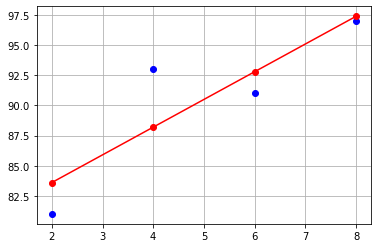

In [35]:
plt.plot(x, y, 'bo')
plt.plot(x, y1, 'r-o')
plt.grid()
plt.show()

# 선형회귀(Linear Regression)

또는 최소제곱법

- 종속변수(응답변수) y와 한 개 이상의 독립변수(입력변수) x와의 상관관계를 모델링한 것

수식 2개

## 비용함수(Cost / Cost function)

그려진 직선 Hypothesis(H(x))와 실제 데이터(y)의 차이

-

-

-

수식

## 평균제곱오차(MSE) - 잘못 그은 선 바로잡기

- 

-

-

| X(hour) | Y(score) |
| ------------ | ------------ |
| 0            | 0           |
| 1            | 1           |
| 2            | 2           |
| 3            | 3           |

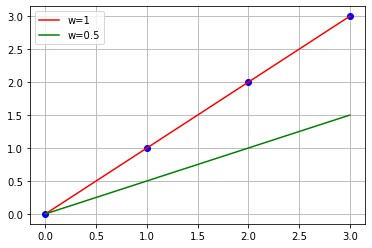

In [71]:
x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 2, 3])

# 가중치 및 편향 1
w = 1
b = 0

y_pred1 = w*x + b

plt.plot(x, y, 'bo')
plt.plot(x, y_pred1, 'r-', label='w=1')


# 가중치 및 편향 2
w = 0.5
b = 0

y_pred2 = w*x + b

plt.plot(x, y_pred2, 'g-', label='w=0.5')

plt.legend()
plt.grid()
plt.show()

## 평균제곱오차(MSE) 연습문제

In [65]:
def mse(y_pred, y):
    cost = np.sum((y - y_pred)**2) / len(y)

    return cost

In [66]:
cost = mse(y_pred1, y)
print(cost)

cost = mse(y_pred2, y)
print(cost)

0.0
0.875


## 경사하강법 - 오차 수정하기

어떻게 비용함수 값이 최소가 되는 W 파라미터를 구할 수 있을까?

- 

- 

### learning_rage(학습 속도) 란?

- 

- 

- 